### Libraries

In [1]:
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np
import pandas as pd
import time
from tqdm.notebook import tnrange, tqdm
import os

### Inputs parameters

In [2]:
Ntsteps = 1800
Ninterfaces = 63
Nx = 64
Ny = Nx
Nr = 100
L = 1000.
dx = L/Nx
dy = dx

In [3]:
# run_name = 'Run_no_zero_flow_Run_1610993549'./../../MC_runs/Run_no_zero_flow_no_oscilations_Run_Run_1620834677/MC/runs/
folder_name = './../../../MC_runs/Run_no_zero_flow_no_oscilations_Run_Run_1646968123/MC/runs/'

### Create aux variables

In [4]:
k=np.zeros(Nx*Ny)
qcell = np.zeros((Ny,Ntsteps))
q_x = np.zeros((Nr,Ntsteps))
q_y = np.zeros((Nr,Ntsteps))

HMC = np.zeros((Nr+2,Nx,Ntsteps))

In [5]:
def harm_2(a,b):
    
    harm = 1/a+1/b
    harm = 2/harm
    
    return harm

In [6]:
ir =1

In [7]:
f = open(f'./{folder_name}/{ir}/6_months_run.hed')
f_k = open(f'./{folder_name}/{ir}/karray_1.0.txt')

hmc = np.loadtxt(f)
K = np.loadtxt(f_k)

P = hmc.reshape((Ntsteps,64,64))
K = K.reshape((64,64)) 

In [9]:
q_tot_start = list()
q_tot_mid = list()
q_tot_end = list()

for ir in tnrange(1,101):
#     print(ir)
    #     time.sleep(10)
    f = open(f'./{folder_name}/{ir}/6_months_run.hed')
    f_k = open(f'./{folder_name}/{ir}/karray_1.0.txt')

    hmc = np.loadtxt(f)
    K = np.loadtxt(f_k)

    P = hmc.reshape((Ntsteps,64,64))
    K = K.reshape((64,64)) 

    dP_x_start = P[:,:,0]-P[:,:,1]
    k_x_start = harm_2(K[:,0],K[:,1])
    q_x_start = dP_x_start*k_x_start/dx
    q_x_start = np.mean(q_x_start,axis=1)

    dP_x_mid = P[:,:,31]-P[:,:,32]
    k_x_mid = harm_2(K[:,31],K[:,32])
    q_x_mid = dP_x_mid*k_x_mid/dx
    q_x_mid = np.mean(q_x_mid,axis=1)

    dP_x_end = P[:,:,62]-P[:,:,63]
    k_x_end = harm_2(K[:,62],K[:,63])
    q_x_end = dP_x_end*k_x_end/dx
    q_x_end = np.mean(q_x_end,axis=1)

    q_tot_start.append(q_x_start)
    q_tot_mid.append(q_x_mid)
    q_tot_end.append(q_x_end)

  0%|          | 0/100 [00:00<?, ?it/s]

### Save parameters

In [15]:
np.savetxt(f'./{folder_name}/../flow/Q_x_start.txt',np.array(q_tot_start))
np.savetxt(f'./{folder_name}/../flow/Q_x_mid.txt',np.array(q_tot_mid))
np.savetxt(f'./{folder_name}/../flow/Q_x_end.txt',np.array(q_tot_end))

In [14]:
os.mkdir(f'./{folder_name}/../flow')

In [17]:
folder_name

'./../../../MC_runs/Run_no_zero_flow_no_oscilations_Run_Run_1646968123/MC/runs/'

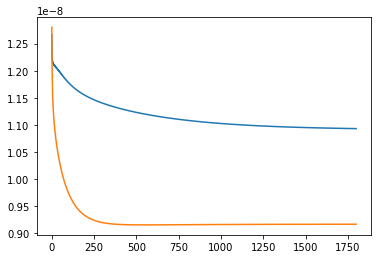

In [24]:
plt.plot(np.mean(np.array(q_tot_mid),axis=0))
plt.plot(np.mean(np.array(q_tot_start),axis=0))

In [16]:
plt.plot(np.min(q_x_list,axis=0)[:,4]/((P[:,0,0]-1)/1000))

NameError: name 'q_x_list' is not defined

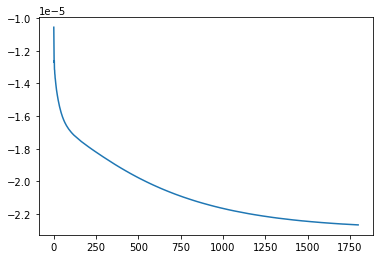

In [19]:
plt.plot(np.min(q_y_list,axis=0)[:,4]/((P[:,0,0]-P[:,-1,0])/1000))

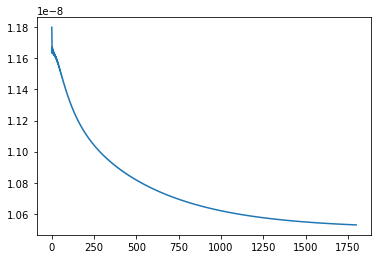

In [23]:
plt.plot(np.mean(q_x_list,axis=0)[:,4])

In [24]:
K_X = np.mean(q_x_list,axis=0)[:,4]/((P[:,32,0]-1)/1000)

In [25]:
np.savetxt(f'./{folder_name}/../flow/K_X.txt',K_X)

In [26]:
K_Y = np.mean(q_y_list,axis=0)[:,4]/((P[:,0,0]-P[:,-1,0])/1000)
np.savetxt(f'./{folder_name}/../flow/K_Y.txt',K_Y)

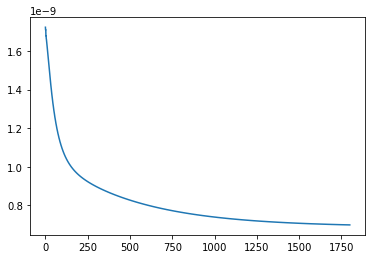

In [27]:
plt.plot(np.mean(q_y_list,axis=0)[:,4])

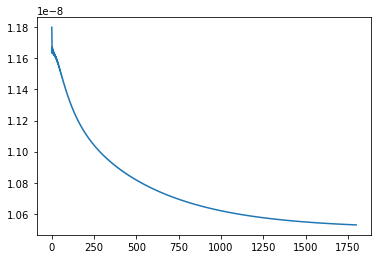

In [32]:
plt.plot(np.mean(q_x_list,axis=0)[:,4])

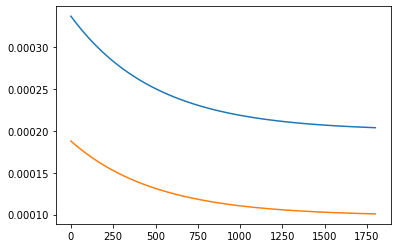

In [28]:
plt.plot((P[:,0,0]-1)/1000)
plt.plot((P[:,32,0]-1)/1000)